In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)


In [2]:
telecom_data = pd.read_csv("tel_data.csv")
telecom_data.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,3330.0,37882.0,1.321510e+09,undefined,undefined,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,109.795706,17.662883,70.0,54.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.

In [3]:
telecom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [3]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

In [4]:
telecom_data.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

# Task 3.1

##### Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):

#### Average TCP retransmission

In [24]:
#  Group by 'MSISDN/Number' and calculate the average TCP retransmissin per customer

average_TCP_per_cust = telecom_data.groupby('MSISDN/Number')['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'].mean().reset_index()

average_TCP_per_cust['Average TCP'] = average_TCP_per_cust[['TCP DL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)']].mean(axis=1)

#Display the resulting DataFrame with 'MSISDN/Number' and 'Average RTT' columns
print(average_TCP_per_cust[['MSISDN/Number', 'Average TCP']].head())


   MSISDN/Number   Average TCP
0   3.360100e+10  2.080991e+07
1   3.360100e+10  2.080991e+07
2   3.360100e+10  2.080991e+07
3   3.360101e+10  1.066000e+03
4   3.360101e+10  1.507977e+07


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Average Throughput,Cluster
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,33.5,0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,21.0,0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,7.5,0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,3330.0,37882.0,1.321510e+09,undefined,undefined,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,44.0,0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,7.5,0


#### Average RTT

In [12]:
# Group by 'MSISDN/Number' and calculate the average RTT per customer

average_rtt_per_cust = telecom_data.groupby('MSISDN/Number')['Avg RTT DL (ms)','Avg RTT UL (ms)'].mean().reset_index()

average_rtt_per_cust['Average RTT'] = average_rtt_per_cust[['Avg RTT DL (ms)','Avg RTT UL (ms)']].mean(axis=1)

 #Display the resulting DataFrame with 'MSISDN/Number' and 'Average RTT' columns
print(average_rtt_per_cust[['MSISDN/Number', 'Average RTT']].head())


   MSISDN/Number  Average RTT
0   3.360100e+10    23.000000
1   3.360100e+10    15.500000
2   3.360100e+10    63.729294
3   3.360101e+10    42.000000
4   3.360101e+10    29.750000


#### Handset type

In [13]:
# Group by MSISDN and aggregate metrics for Handset Type

agg_handset_per_cust = telecom_data.groupby('MSISDN/Number').agg({'Handset Type' :'first'}).reset_index()

# Report the top 10 customers per handset type
top_10_handset_types = agg_handset_per_cust['Handset Type'].value_counts().head(10)

# display the results
print("Top 10 Handset Types:")
print(top_10_handset_types)

Top 10 Handset Types:
Huawei B528S-23A                10615
Apple iPhone 6S (A1688)          6759
undefined                        6670
Apple iPhone 6 (A1586)           6260
Apple iPhone 7 (A1778)           4699
Apple iPhone Se (A1723)          3754
Apple iPhone 8 (A1905)           3543
Samsung Galaxy S8 (Sm-G950F)     3245
Apple iPhone Xr (A2105)          3072
Samsung Galaxy J5 (Sm-J530)      2748
Name: Handset Type, dtype: int64


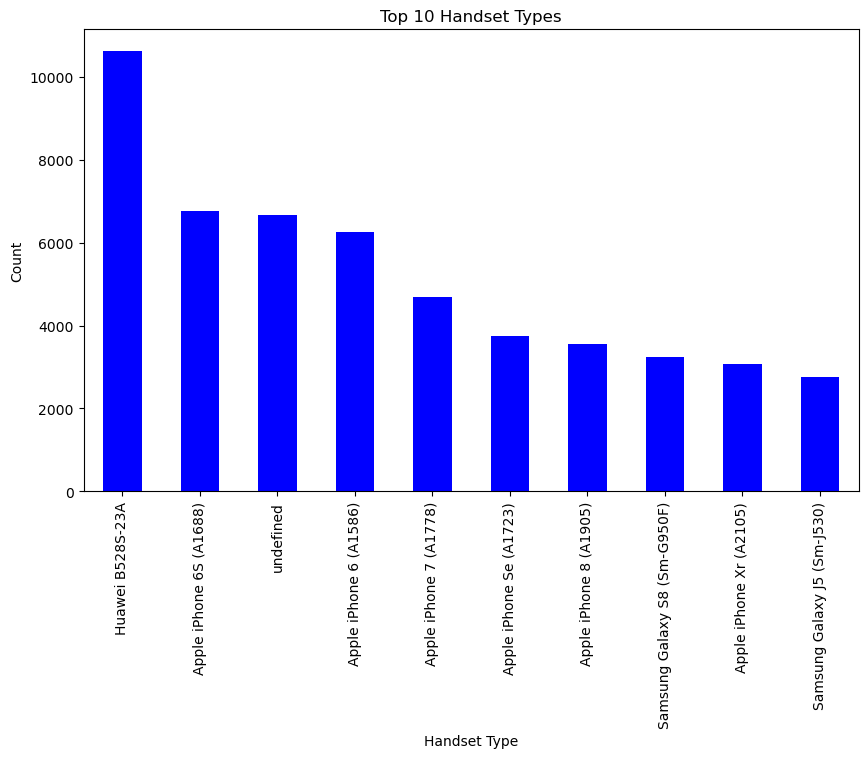

In [14]:
# graphical representation of top 10 handset types as per customer

top_10_handset_types.plot(kind = 'bar',figsize = (10,6),color = 'blue')
plt.title('Top 10 Handset Types')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.show()


#### Average throughput

In [15]:
# Group by MSISDN and calculate average throughput

avg_throughput_per_cust = telecom_data.groupby('MSISDN/Number').agg({'Avg Bearer TP DL (kbps)': 'mean','Avg Bearer TP DL (kbps)' : 'mean'}).reset_index()


# Display the result 
print((avg_throughput_per_cust).head())
telecom_data.head()

   MSISDN/Number  Avg Bearer TP DL (kbps)
0   3.360100e+10                     37.0
1   3.360100e+10                     48.0
2   3.360100e+10                     48.0
3   3.360101e+10                    204.0
4   3.360101e+10                  20197.5


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,3330.0,37882.0,1.321510e+09,undefined,undefined,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Task 3.2

### Compute & list 10 of the top, bottom and most frequent:
-TCP values in the dataset. 
-RTT values in the dataset. 
-Throughput values in the dataset.

#### TCP DL Retrans values

In [16]:
# Display the top TCP values

top_TCP_values = telecom_data['TCP DL Retrans. Vol (Bytes)'].nlargest(10)



print("Top 10 TCP Values :")
print(top_TCP_values)

# Display the bottom RTT values
bottom_TCP_values = telecom_data['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
print ("\nBottom 10 TCP Values :")
print(bottom_TCP_values)

# Display the most frequent RTT values
most_frequent_TCP_values = telecom_data['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10)

print("\n Most Frequent 10 TCP values :")
print(most_frequent_TCP_values)
telecom_data.head()

Top 10 TCP Values :
77950     4.294426e+09
135677    4.291380e+09
34636     4.289877e+09
140797    4.289488e+09
3741      4.288060e+09
119667    4.275259e+09
39608     4.268432e+09
76971     4.259997e+09
59011     4.256650e+09
41182     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP Values :
59708     2.0
125088    2.0
2818      4.0
39582     4.0
52480     4.0
60366     4.0
60417     4.0
75082     4.0
100305    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

 Most Frequent 10 TCP values :
2.080991e+07    88146
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
5.320000e+03      102
Name: TCP DL Retrans. Vol (Bytes), dtype: int64


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,3330.0,37882.0,1.321510e+09,undefined,undefined,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#### TCP UL Retrans values

In [17]:
# Display the top TCP values

top_TCP_values = telecom_data['TCP UL Retrans. Vol (Bytes)'].nlargest(10)



print("Top 10 TCP Values :")
print(top_TCP_values)

# Display the bottom RTT values
bottom_TCP_values = telecom_data['TCP UL Retrans. Vol (Bytes)'].nsmallest(10)
print ("\nBottom 10 TCP Values :")
print(bottom_TCP_values)

# Display the most frequent RTT values
most_frequent_TCP_values = telecom_data['TCP UL Retrans. Vol (Bytes)'].value_counts().head(10)

print("\n Most Frequent 10 TCP values :")
print(most_frequent_TCP_values)


Top 10 TCP Values :
36181     2.908226e+09
76625     2.636857e+09
67304     2.455600e+09
1491      2.260359e+09
133262    1.751384e+09
35127     1.727810e+09
142218    1.237862e+09
142431    7.948258e+08
66068     7.195718e+08
1369      5.262463e+08
Name: TCP UL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP Values :
13260     1.0
15237     1.0
36067     1.0
38380     1.0
75076     1.0
78672     1.0
90210     1.0
124047    1.0
138813    1.0
138997    1.0
Name: TCP UL Retrans. Vol (Bytes), dtype: float64

 Most Frequent 10 TCP values :
759658.664811    96649
1330.000000       1910
2660.000000        937
1294.000000        651
3990.000000        548
1318.000000        545
5320.000000        366
6650.000000        271
2636.000000        234
7980.000000        219
Name: TCP UL Retrans. Vol (Bytes), dtype: int64


#### RTT DL (ms)

In [18]:
# Display the top RTT values

top_rtt_values = telecom_data['Avg RTT DL (ms)'].nlargest(10)

print("Top 10 RTT Values :")
print(top_rtt_values)

# Display the bottom RTT values
bottom_rtt_values = telecom_data['Avg RTT DL (ms)'].nsmallest(10)
print ("\nBottom 10 RTT Values :")
print(bottom_rtt_values)

# Display the most frequent RTT values
most_frequent_rtt_values = telecom_data['Avg RTT DL (ms)'].value_counts().head(10)

print("\n Most Frequent 10 RTT values :")
print(most_frequent_rtt_values)


Top 10 RTT Values :
30155     96923.0
29916     64640.0
17894     55811.0
5963      54847.0
22839     26971.0
23442     26250.0
1361      25873.0
81256     25602.0
97312     25374.0
100575    24733.0
Name: Avg RTT DL (ms), dtype: float64

Bottom 10 RTT Values :
42602     0.0
52217     0.0
60143     0.0
61144     0.0
61337     0.0
103321    0.0
124538    0.0
142526    0.0
143878    0.0
71738     2.0
Name: Avg RTT DL (ms), dtype: float64

 Most Frequent 10 RTT values :
109.795706    27829
28.000000      3553
27.000000      3380
34.000000      3296
35.000000      2892
37.000000      2718
36.000000      2645
38.000000      2547
29.000000      2498
26.000000      2488
Name: Avg RTT DL (ms), dtype: int64


##### RTT UL (Bytes)

In [19]:
# Display the top RTT values

top_rtt_values = telecom_data['Avg RTT UL (ms)'].nlargest(10)

print("Top 10 RTT Values :")
print(top_rtt_values)

# Display the bottom RTT values
bottom_rtt_values = telecom_data['Avg RTT UL (ms)'].nsmallest(10)
print ("\nBottom 10 RTT Values :")
print(bottom_rtt_values)

# Display the most frequent RTT values
most_frequent_rtt_values = telecom_data['Avg RTT UL (ms)'].value_counts().head(10)

print("\n Most Frequent 10 RTT values :")
print(most_frequent_rtt_values)


Top 10 RTT Values :
20013     7120.0
132554    5607.0
85010     5422.0
183       5279.0
95341     4677.0
42087     4226.0
49591     4021.0
137931    3923.0
124860    3093.0
45992     3029.0
Name: Avg RTT UL (ms), dtype: float64

Bottom 10 RTT Values :
54     0.0
99     0.0
175    0.0
186    0.0
299    0.0
342    0.0
365    0.0
399    0.0
498    0.0
502    0.0
Name: Avg RTT UL (ms), dtype: float64

 Most Frequent 10 RTT values :
17.662883    27812
5.000000     14663
2.000000     14277
1.000000     12826
4.000000     10242
3.000000      7935
6.000000      7518
7.000000      4196
0.000000      4126
8.000000      3209
Name: Avg RTT UL (ms), dtype: int64


#### Throughput values

In [20]:
# Display the top 'Avg Bearer TP DL (kbps) values

top_Avg_Bearer_values = telecom_data['Avg Bearer TP DL (kbps)'].nlargest(10)

print("Top 10 Avg Bearer TP Values :")
print(top_Avg_Bearer_values)

# Display the bottom Average Bearer TP values
bottom_Avg_Bearer_values = telecom_data['Avg Bearer TP DL (kbps)'].nsmallest(10)
print ("\nBottom 10 Avg Bearer Values :")
print(bottom_Avg_Bearer_values)

# Display the most frequent Average Bearer TP values
most_frequent_Avg_Bearer_values = telecom_data['Avg Bearer TP DL (kbps)'].value_counts().head(10)

print("\n Most Frequent 10 Average Bearer  TP values :")
print(most_frequent_Avg_Bearer_values)


Top 10 Avg Bearer TP Values :
120876    378160.0
141250    299257.0
143670    299002.0
149616    276040.0
92177     269362.0
117776    266332.0
115836    265440.0
89567     264448.0
116550    263047.0
41551     254253.0
Name: Avg Bearer TP DL (kbps), dtype: float64

Bottom 10 Avg Bearer Values :
13      0.0
148     0.0
543     0.0
614     0.0
675     0.0
803     0.0
887     0.0
1176    0.0
1258    0.0
2314    0.0
Name: Avg Bearer TP DL (kbps), dtype: float64

 Most Frequent 10 Average Bearer  TP values :
23.0    7324
43.0    4352
44.0    4186
6.0     3983
22.0    2867
48.0    2778
63.0    2757
42.0    2689
45.0    2644
47.0    2263
Name: Avg Bearer TP DL (kbps), dtype: int64


In [16]:
# Display the top 'Avg Bearer TP UL (kbps) values

top_Avg_Bearer_values = telecom_data['Avg Bearer TP UL (kbps)'].nlargest(10)

print("Top 10 Avg Bearer TP Values :")
print(top_Avg_Bearer_values)

# Display the bottom Average Bearer TP values
bottom_Avg_Bearer_values = telecom_data['Avg Bearer TP UL (kbps)'].nsmallest(10)
print ("\nBottom 10 Avg Bearer Values :")
print(bottom_Avg_Bearer_values)

# Display the most frequent Average Bearer TP values
most_frequent_Avg_Bearer_values = telecom_data['Avg Bearer TP UL (kbps)'].value_counts().head(10)

print("\n Most Frequent 10 Average Bearer  TP values :")
print(most_frequent_Avg_Bearer_values)


Top 10 Avg Bearer TP Values :
92364     58613.0
5900      57792.0
137154    57750.0
116882    57006.0
99287     56763.0
91298     54032.0
45400     53572.0
9260      52640.0
91606     52084.0
124757    51562.0
Name: Avg Bearer TP UL (kbps), dtype: float64

Bottom 10 Avg Bearer Values :
148     0.0
335     0.0
344     0.0
602     0.0
614     0.0
1123    0.0
1143    0.0
1188    0.0
1234    0.0
1257    0.0
Name: Avg Bearer TP UL (kbps), dtype: float64

 Most Frequent 10 Average Bearer  TP values :
40.0    7794
54.0    6344
47.0    5840
53.0    4835
9.0     3812
52.0    3786
51.0    3646
44.0    3366
46.0    3216
55.0    2871
Name: Avg Bearer TP UL (kbps), dtype: int64


# Task 3.3

Compute & report: The distribution of the average throughput per handset type and provide interpretation for your findings.

In [21]:
# Calculate average throughput per handset type

telecom_data['Average Throughput'] =(telecom_data['Avg Bearer TP UL (kbps)']+telecom_data['Avg Bearer TP DL (kbps)'])/2

# Group by Handset Type and calculate the mean throughput
average_throughput_per_type = telecom_data.groupby('Handset Type')['Average Throughput'].mean()

# print the distribution
print(average_throughput_per_type)


Handset Type
A-Link Telecom I. Cubot A5                                                                     11755.000000
A-Link Telecom I. Cubot Note Plus                                                               3349.500000
A-Link Telecom I. Cubot Note S                                                                  4468.500000
A-Link Telecom I. Cubot Nova                                                                   28108.500000
A-Link Telecom I. Cubot Power                                                                  34734.000000
A-Link Telecom I. Cubot R9                                                                      2019.500000
A-Link Telecom I. Cubot X18 Plus                                                                6279.500000
Acer Liquid M220                                                                                  17.000000
Acer Liquid Z220                                                                                 276.000000
Acer Liquid Z53

#### The average TCP retransmission view per handset type and provide interpretation for your findings

In [14]:
# Calculate average TCP retransmission per handset type

telecom_data['Average TCP Retrans'] =(telecom_data['TCP DL Retrans. Vol (Bytes)']+telecom_data['TCP UL Retrans. Vol (Bytes)'])/2

# Group by Handset Type and calculate the mean throughput
average_TCP_retrans_per_type = telecom_data.groupby('Handset Type')['Average TCP Retrans'].mean()

# print the distribution
print(average_TCP_retrans_per_type)


Handset Type
A-Link Telecom I. Cubot A5                                                                     1.078479e+07
A-Link Telecom I. Cubot Note Plus                                                              3.081065e+05
A-Link Telecom I. Cubot Note S                                                                 2.070587e+07
A-Link Telecom I. Cubot Nova                                                                   6.858500e+04
A-Link Telecom I. Cubot Power                                                                  4.020500e+03
A-Link Telecom I. Cubot R9                                                                     1.549950e+04
A-Link Telecom I. Cubot X18 Plus                                                               8.629524e+05
Acer Liquid M220                                                                               1.078479e+07
Acer Liquid Z220                                                                               8.719350e+04
Acer Liquid Z53

# Task 3.4

Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

         TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
Cluster                                                             
0                       1.574822e+07                 6.246213e+05   
1                       5.093191e+07                 8.695106e+05   
2                       7.035399e+07                 2.139728e+09   

         Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
Cluster                                                              
0             114.682236        14.391796              5683.619093   
1              80.704789        37.134900             58632.684176   
2              96.857143        31.571429             64720.285714   

         Avg Bearer TP UL (kbps)  
Cluster                           
0                     487.661697  
1                    9403.864203  
2                   15166.714286  


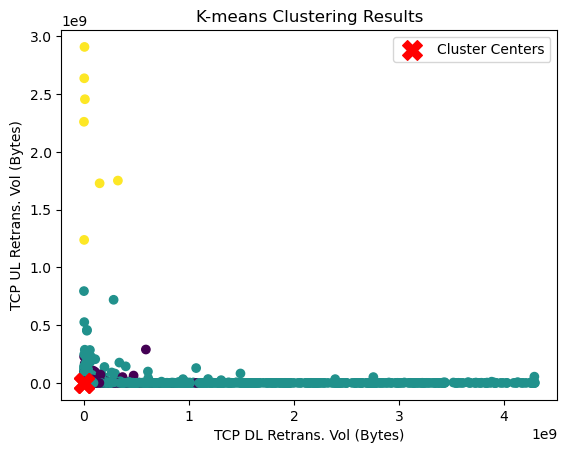

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Average Throughput,Cluster
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,33.5,0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,21.0,0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,7.5,0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,3330.0,37882.0,1.321510e+09,undefined,undefined,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,44.0,0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,7.5,0


In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# select relevant columns for clustering
columns_for_clustering = ['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# subset the dataFrame with selected columns
selected_data = telecom_data[columns_for_clustering]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# #perform K Means clustering with k=3

kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit_predict(scaled_data)
telecom_data['Cluster'] = kmeans.labels_
# # Analysis the clusters
cluster_descriptions = telecom_data.groupby('Cluster')[columns_for_clustering].mean()

# # print the descriptions of each cluster
print(cluster_descriptions)


# # Visualize the clusters (pairwise scatter plots for the first two columns)
plt.scatter(telecom_data[columns_for_clustering[0]], telecom_data[columns_for_clustering[1]], c=telecom_data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel(columns_for_clustering[0])
plt.ylabel(columns_for_clustering[1])
plt.title('K-means Clustering Results')
plt.legend()
plt.show()

telecom_data.head()

In [25]:
telecom_data.to_csv('experience_clusters.csv',index = False)